# Spaceship Titanic

Predict which passengers are transported to an alternate dimension

## Dataset Description
In this competition the task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help make these predictions, we are given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions

<ul>
<li><strong>train.csv</strong> - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.<ul>
<li><code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form <code>gggg_pp</code> where <code>gggg</code> indicates a group the passenger is travelling with and <code>pp</code> is their number within the group. People in a group are often family members, but not always.</li>
<li><code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.</li>
<li><code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.</li>
<li><code>Cabin</code> - The cabin number where the passenger is staying. Takes the form <code>deck/num/side</code>, where <code>side</code> can be either <code>P</code> for <em>Port</em> or <code>S</code> for <em>Starboard</em>.</li>
<li><code>Destination</code> - The planet the passenger will be debarking to.</li>
<li><code>Age</code> - The age of the passenger.</li>
<li><code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.</li>
<li><code>RoomService</code>, <code>FoodCourt</code>, <code>ShoppingMall</code>, <code>Spa</code>, <code>VRDeck</code> - Amount the passenger has billed at each of the <em>Spaceship Titanic</em>'s many luxury amenities.</li>
<li><code>Name</code> - The first and last names of the passenger.</li>
<li><code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.</li></ul></li>
<li><strong>test.csv</strong> - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of <code>Transported</code> for the passengers in this set. </li>
<li><strong>sample_submission.csv</strong> - A submission file in the correct format.<ul>
<li><code>PassengerId</code> - Id for each passenger in the test set.</li>
<li><code>Transported</code> - The target. For each passenger, predict either <code>True</code> or <code>False</code>.</li></ul></li>
</ul>

### Dependencies

First, we'll import the necessary libraries and import the data

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [88]:
# Laod data
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

## Step 1: Data Exploration and Cleaning

Now, we'll explore the data and clean it.

### 1.1 Summary statistics and data types
In this step, we compute summary statistics such as mean, standard deviation, and range for each numerical variable in our dataset. We also inspect the data types of each variable to ensure that they are correctly identified as numerical, categorical, or datetime. This helps us to understand the overall structure of the dataset and identify potential data quality issues such as missing values, incorrect data types, or extreme values that may need further investigation.

In [89]:
print(f'There are {len(train_data)} samples in the training data.')
print(f'There are {len(test_data)} samples in the training data.')

There are 8693 samples in the training data.
There are 4277 samples in the training data.


In [90]:
print(train_data.dtypes)


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [91]:
print(train_data.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [92]:
print(train_data.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


### 1.2 Deal with unexpected values

In [93]:
for col in train_data.select_dtypes(include='object'):
    train_data[col] = train_data[col].fillna('Unknown')
    test_data[col] = test_data[col].fillna('Unknown')

For float numbers, we use Regression imputation, which is a technique for imputing missing values in a dataset by modeling the relationship between variables using regression analysis. Instead of simply filling in the missing values with a statistic like the mean or median, regression imputation attempts to predict the missing values based on other variables in the dataset.

In [94]:
for col in train_data.select_dtypes(include='float64'):
    imputer = IterativeImputer()
    train_data[col] = imputer.fit_transform(train_data[[col]])
    test_data[col] = imputer.fit_transform(test_data[[col]])

Verify that we have cleaned the data.

In [95]:
print(train_data.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


### 1.3 Data visualisation
In this step, we create visualizations such as histograms, box plots, and pairplots to explore the distribution of each variable and identify patterns or relationships between variables. Data visualization helps us to identify outliers, potential errors, and interesting patterns that may not be evident from summary statistics alone.

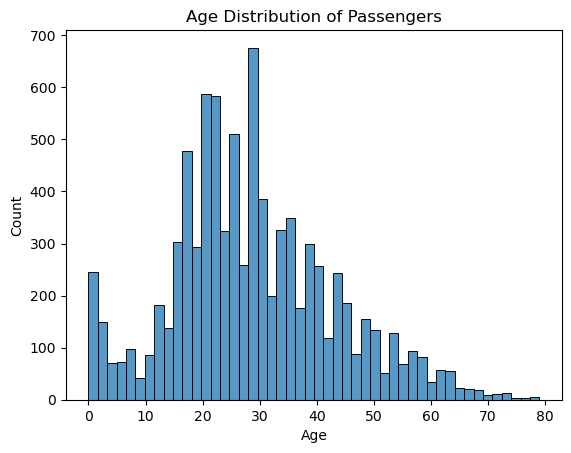

In [96]:
# Histogram of age distribution
sns.histplot(train_data['Age'])
plt.title('Age Distribution of Passengers')
plt.show()

__Explanation__: This histogram above shows the distribution of passengers' ages aboard the Spaceship Titanic. It helps us understand the age demographics of the passengers and identify any patterns or anomalies related to age.

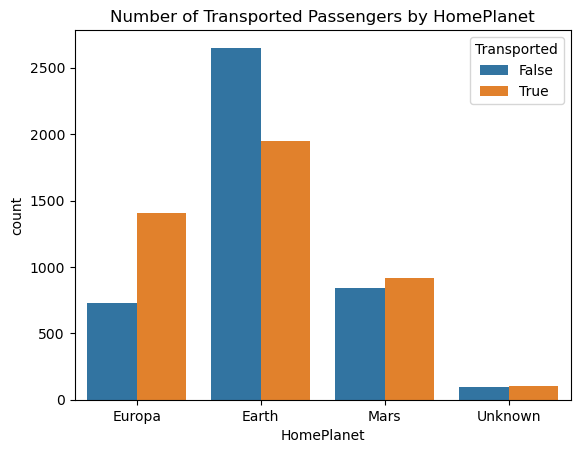

In [97]:
# Bar plot of HomePlanet vs Transported
sns.countplot(x='HomePlanet', hue='Transported', data=train_data)
plt.title('Number of Transported Passengers by HomePlanet')
plt.show()

__Explanation__: The bar plot above displays the number of transported and non-transported passengers for each HomePlanet. This visualization helps us identify if there is any relationship between a passenger's HomePlanet and the likelihood of being transported to another dimension.

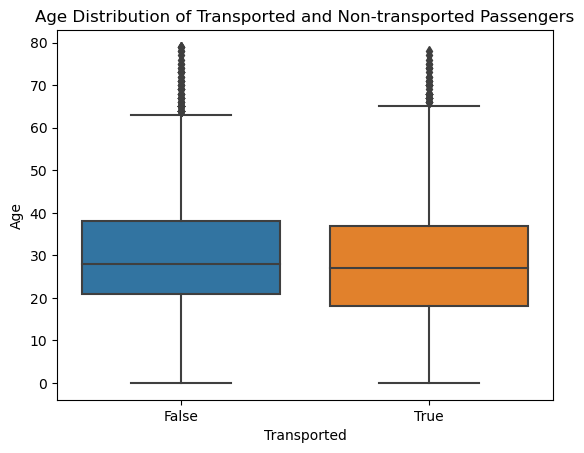

In [98]:
# Box plot of Age vs Transported
sns.boxplot(x='Transported', y='Age', data=train_data)
plt.title('Age Distribution of Transported and Non-transported Passengers')
plt.show()

__Explanation__: This box plot above shows the age distribution for transported and non-transported passengers. It helps us identify if there is any relationship between a passenger's age and their likelihood of being transported to another dimension.

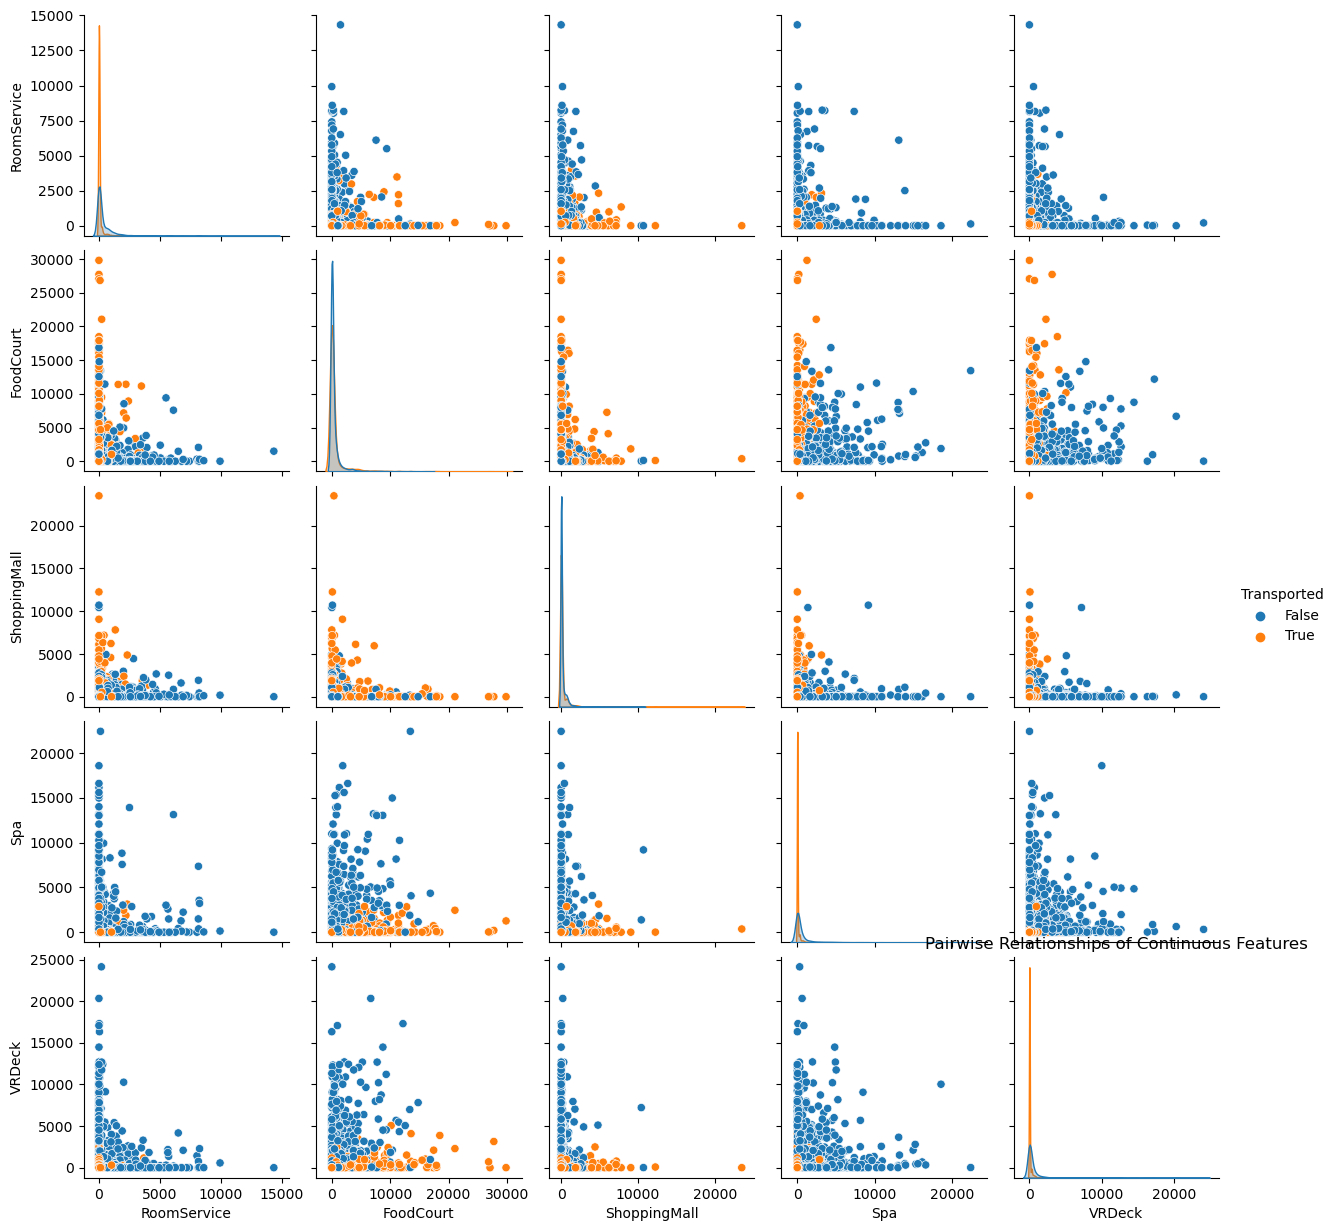

In [99]:
# Pairplot for continuous variables
sns.pairplot(train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']], hue='Transported')
plt.title('Pairwise Relationships of Continuous Features')
plt.show()


__Explanation__: The pair plot illustrates the pairwise relationships between continuous features (RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck) and their association with the target variable (Transported). It helps us identify patterns or correlations between the features, and aids in understanding which features might be important for predicting whether a passenger was transported to another dimension.

### 1.4 Outlier detection
In this step, we identify potential outliers or extreme values in our dataset that may indicate measurement errors or other data quality issues. Outliers can have a significant impact on statistical analysis and modeling, so it's important to identify and handle them appropriately.

In [100]:
# Check for outliers in continuous variables using the IQR method
def detect_outliers(data, columns):
    outlier_indices = []
    for column in columns:
        Q1 = data[column].quantile(0.1)
        Q3 = data[column].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        outlier_indices.extend(column_outliers)
    return outlier_indices

outliers_to_remove = detect_outliers(train_data, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

# Remove outliers if necessary
train_data = train_data.drop(outliers_to_remove, axis=0).reset_index(drop=True)


### 1.5 Correlation analysis
In this step, we explore the relationship between pairs of variables in our dataset. We calculate the correlation coefficient between each pair of numerical variables to measure the strength and direction of their relationship. Correlation analysis helps us to identify potential multicollinearity issues in our data, which can affect the performance of statistical models. It also helps us to identify interesting patterns or relationships between variables that may warrant further investigation.

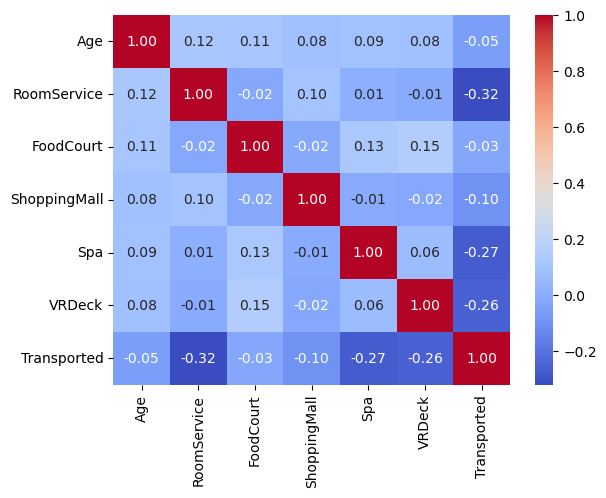

             RoomService       Spa    VRDeck  Transported
RoomService          NaN       NaN       NaN    -0.321580
Spa                  NaN       NaN       NaN    -0.271373
VRDeck               NaN       NaN       NaN    -0.257809
Transported     -0.32158 -0.271373 -0.257809          NaN


In [101]:
# Correlation matrix
corr_matrix = train_data.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Find highly correlated features
threshold = 0.2
high_corr = corr_matrix[(abs(corr_matrix) > threshold) & (corr_matrix != 1.0)].dropna(how='all', axis=1).dropna(how='all', axis=0)
print(high_corr)


## 2. Feature Engineering

First, we have to see what the different classes of objects we have.

In [102]:
# Inspect non numeric columns
for col in train_data.columns:
    if not np.issubdtype(train_data[col].dtype, np.number):
        print(f'{col}: {train_data[col].unique()}')

PassengerId: ['0001_01' '0002_01' '0004_01' ... '9275_01' '9275_02' '9278_01']
HomePlanet: ['Europa' 'Earth' 'Mars' 'Unknown']
CryoSleep: [False True 'Unknown']
Cabin: ['B/0/P' 'F/0/S' 'F/1/S' ... 'G/1508/P' 'A/97/P' 'G/1499/S']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 'Unknown']
VIP: [False 'Unknown' True]
Name: ['Maham Ofracculy' 'Juanna Vines' 'Willy Santantines' ...
 'Polaton Conable' 'Diram Conable' 'Kurta Mondalley']
Transported: [False  True]


### 2.1 PassengerID

Here, we split the "PassengerId" column of the "train_data" DataFrame into two parts: "gggg" and "pp". The former is the group number for each passenger, and the latter is the person number within each group. After creating these new columns, we updated the "pp" values so that for the same "gggg" value, only the maximum "pp" value was retained.

In [103]:
# Split PassangerID
train_data[['gggg', 'pp']] = pd.DataFrame(train_data['PassengerId'].str.split('_', expand=True))
train_data['pp'] = train_data.groupby('gggg')['pp'].transform('max')

test_data[['gggg', 'pp']] = pd.DataFrame(test_data['PassengerId'].str.split('_', expand=True))
test_data['pp'] = test_data.groupby('gggg')['pp'].transform('max')

### 2.2 Cabin

Splitting the string data in the 'Cabin' column into two subcategories, 'Deck' and 'CabinSide' to extract valuable information from the data.

In [104]:
# Extract group size and cabin information
train_data['Deck'] = train_data['Cabin'].apply(lambda x: x.split('/')[0])
train_data['CabinSide'] = train_data['Cabin'].apply(lambda x: x.split('/')[-1])

test_data['Deck'] = test_data['Cabin'].apply(lambda x: x.split('/')[0])
test_data['CabinSide'] = test_data['Cabin'].apply(lambda x: x.split('/')[-1])

### 2.3 Name - Male or Female?
Extrapolating gender from names in feature engineering can be useful when working with datasets that do not have explicit gender information. This technique involves using the name of an individual to predict their gender based on common gender associations with certain names. By including gender as a feature in a machine learning model, we can potentially improve its accuracy by accounting for gender-related patterns in the data. However, it is important to note that this technique is not always accurate, as gender associations with names can vary by culture, region, and time period. 

In [105]:
import gender_guesser.detector as gender

# Create a gender detector object
detector = gender.Detector()

# Define a function to extract the first name from the full name
def get_first_name(full_name):
    return full_name.split()[0]

# Define a function to determine if a name is female
def is_female_name(name):
    gender = detector.get_gender(name)
    return True if gender in ['female', 'mostly_female'] else False

# Create a feature that indicates whether a given name is female
train_data['Name_is_Female'] = train_data['Name'].apply(get_first_name).apply(is_female_name)
test_data['Name_is_Female'] = test_data['Name'].apply(get_first_name).apply(is_female_name)

In [106]:
# set the "PassengerId" column as the index of the DataFrame
train_data.set_index(keys='PassengerId', inplace=True)
test_data.set_index(keys='PassengerId', inplace=True)

### 2.4 Get Dummies

We use get_dummies() to convert categorical data into numerical data for machine learning models. This function converts categorical columns into a set of binary columns, where each column represents a unique value in the original column. By doing this, we can input categorical data into machine learning models that typically require numerical data. get_dummies() is particularly useful when dealing with nominal categorical data, where there is no inherent order to the categories.

In [119]:
# Define which columns we want to get dummy variables from
dummy_cols = ['HomePlanet','Destination', 'Deck','CabinSide']

# Get dummy variables for multiple categorical columns in the dataset
train_dummy_df = pd.get_dummies(train_data[dummy_cols])
test_dummy_df = pd.get_dummies(test_data[dummy_cols])

# Join the dummy variables with the original dataset
train_data = pd.concat([train_data, train_dummy_df], axis=1)
test_data = pd.concat([test_data, test_dummy_df], axis=1)

### 2.6 Drop unwanted columns

Dropping unwanted columns in feature engineering is important for simplifying the model, reducing noise and overfitting, and improving interpretability. It helps to remove redundant or irrelevant features, which can improve model performance and prevent overfitting. By focusing on the most important features, we can make the model more interpretable and better understand the relationships between the features and the target variable.

In [107]:
# Define columns to drop
cols_to_drop =  ['Cabin', 'Name', 'gggg'] + dummy_cols

# Drop columns that we dont need
train_data = train_data.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)



### 2.6 Converting booleans to numerical. 

In [109]:
# Create a dictionary to map column names to data types
#dtype_dict = {col: int for col in train_data.columns if train_data[col].dtype == bool and col != 'Transported'}

# Convert boolean columns to integers
#train_data = train_data.astype(dtype_dict)
#test_data = test_data.astype(dtype_dict)

In [116]:
len(train_data.columns) -1 == len(test_data.columns)

True

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load your cleaned and feature engineered dataset

# Define the features and target variable
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Define a list to store the models
models = []

# Define a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Perform grid search with decision tree classifier
grid_dtc = GridSearchCV(dtc, param_grid, cv=5)
grid_dtc.fit(X_train, y_train)

# Save the decision tree model to the list of models
models.append(('Decision tree', grid_dtc.best_estimator_))

# Define a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Perform grid search with random forest classifier
grid_rfc = GridSearchCV(rfc, param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

# Save the random forest model to the list of models
models.append(('Random forest', grid_rfc.best_estimator_))

# Sort the models based on their validation score
sorted_models = sorted(models, key=lambda x: x[1].score(X_val, y_val), reverse=True)

# Print out the ranked models
print("Ranking of models based on their validation score:\n")
for i, model in enumerate(sorted_models):
    print(f"{i+1}. {model[0]} - validation score: {model[1].score(X_val, y_val):.4f}")


ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ander\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ander\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\ander\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "c:\Users\ander\anaconda3\lib\site-packages\sklearn\base.py", line 560, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "c:\Users\ander\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
  File "c:\Users\ander\anaconda3\lib\site-packages\pandas\core\generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "c:\Users\ander\anaconda3\lib\site-packages\pandas\core\internals\managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "c:\Users\ander\anaconda3\lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "c:\Users\ander\anaconda3\lib\site-packages\pandas\core\internals\blocks.py", line 526, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "c:\Users\ander\anaconda3\lib\site-packages\pandas\core\dtypes\astype.py", line 299, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "c:\Users\ander\anaconda3\lib\site-packages\pandas\core\dtypes\astype.py", line 230, in astype_array
    values = astype_nansafe(values, dtype, copy=copy)
  File "c:\Users\ander\anaconda3\lib\site-packages\pandas\core\dtypes\astype.py", line 170, in astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'Earth'
